# Optimizing Air Travel: A Data-Driven Approach to Flight Delay Analysis and Prediction”

Air travel is essential to global connectivity, but frequent flight delays disrupt schedules,
frustrate passengers, and cost airlines millions. These delays stem from a mix of operational and external factors.

This project analyzes historical flight data to identify key delay drivers, build predictive models,
and deliver actionable insights to improve punctuality and airline efficiency.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("D:\\study\\sem5\\Summer\\SocBiz\\Airline_Delay_Cause.csv")
df.head(7)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
5,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.00,...,0.0,1.79,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0
6,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,...,0.0,0.85,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0


In [3]:
df.shape


(179338, 21)

In [4]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,179338.000000,179338.000000,178997.000000,178747.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
mean,2019.480082,6.485725,327.816969,58.709086,18.572643,2.035742,17.094929,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410204,3.463516,931.001446,164.378035,47.389651,6.894812,56.279604,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,41.000000,6.000000,1.960000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,89.000000,15.000000,5.400000,0.220000,3.300000,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,218.000000,40.000000,14.700000,1.620000,9.860000,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [5]:
df.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [6]:
df.dropna()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.00,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.00,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.00,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.00,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.00,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179333,2015,1,WN,Southwest Airlines Co.,ONT,"Ontario, CA: Ontario International",892.0,184.0,59.21,2.61,...,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0
179334,2015,1,WN,Southwest Airlines Co.,ORF,"Norfolk, VA: Norfolk International",151.0,45.0,18.00,2.01,...,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0
179335,2015,1,WN,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",251.0,68.0,25.17,0.08,...,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0
179336,2015,1,WN,Southwest Airlines Co.,PDX,"Portland, OR: Portland International",793.0,173.0,64.00,1.27,...,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0


Text(0.5, 0, 'Delay (minutes)')

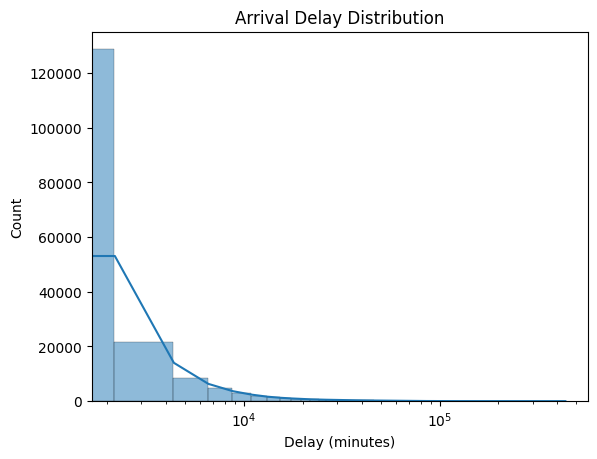

In [7]:
sns.histplot(df["arr_delay"], bins=200, kde=True)
#plt.yscale('log')
plt.xscale('log')
plt.title("Arrival Delay Distribution")
plt.xlabel("Delay (minutes)")

Text(0.5, 1.0, 'Average Delay by Airline')

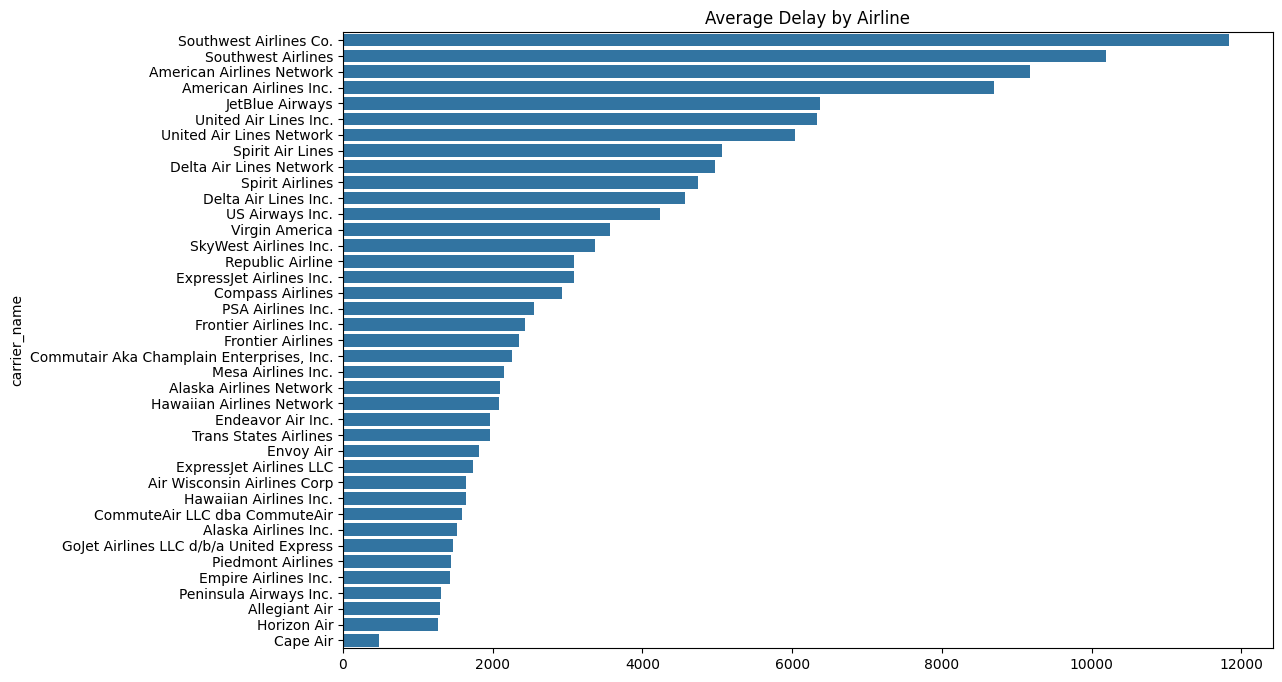

In [8]:
airline_delay = df.groupby("carrier_name")["arr_delay"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=airline_delay.values, y=airline_delay.index)
plt.title("Average Delay by Airline")


Text(0.5, 1.0, 'Monthly Delay Trend')

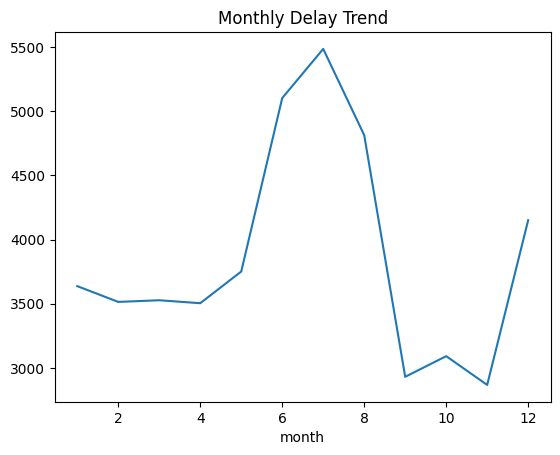

In [9]:
monthly_delay = df.groupby("month")["arr_delay"].mean()
sns.lineplot(x=monthly_delay.index, y=monthly_delay.values)
plt.title("Monthly Delay Trend")


<Axes: title={'center': 'Total Delay by Cause (minutes)'}>

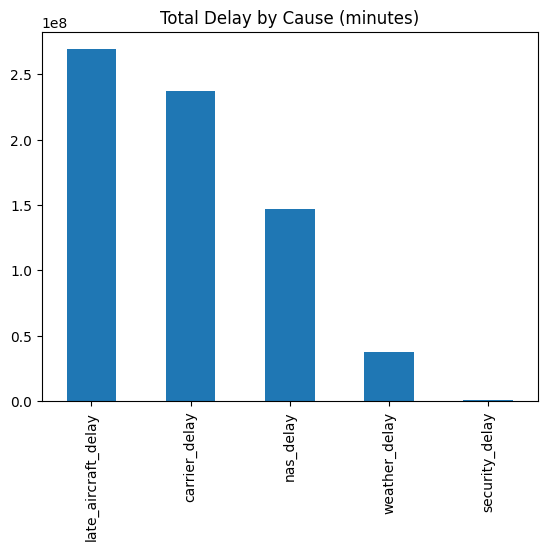

In [10]:
total_reasons = df[["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]].sum()
total_reasons.sort_values(ascending=False).plot(kind='bar', title="Total Delay by Cause (minutes)")


In [11]:
df['is_delayed'] = df['arr_del15'].apply(lambda x: 1 if x > 0 else 0)


In [12]:
df['controllable_delays'] = df['carrier_ct'] + df['late_aircraft_ct']
df['external_delays'] = df['weather_ct'] + df['nas_ct'] + df['security_ct']


In [13]:

# Apply log transformation to handle zeros and skewness
df['log_controllable_delays'] = np.log1p(df['controllable_delays'])  # log(x + 1)
df['log_external_delays'] = np.log1p(df['external_delays'])  # log(x + 1)

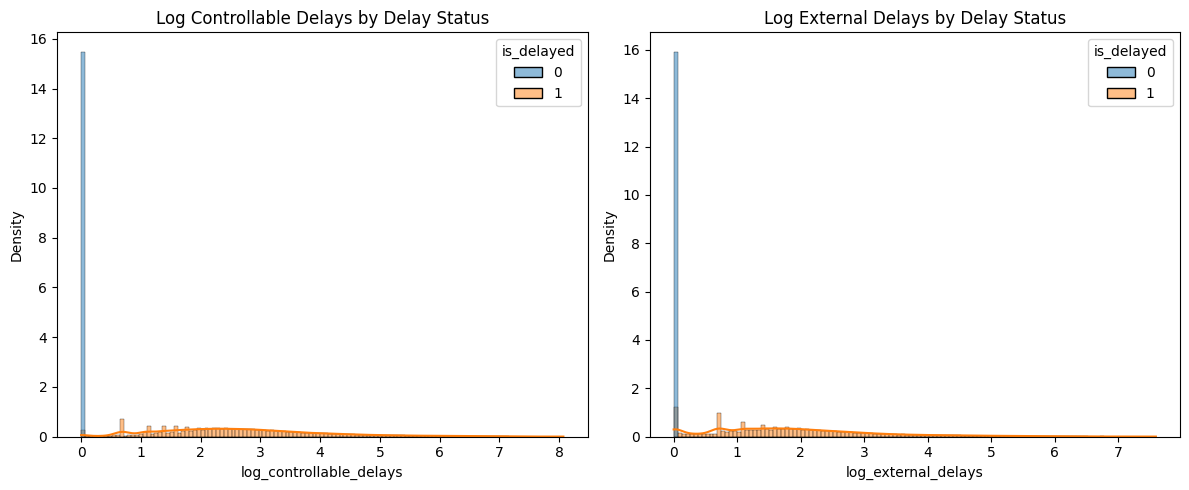

In [14]:
# Histograms with log-transformed data, separated by delay status
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='log_controllable_delays', hue='is_delayed', kde=True, stat='density', common_norm=False)
plt.title('Log Controllable Delays by Delay Status')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='log_external_delays', hue='is_delayed', kde=True, stat='density', common_norm=False)
plt.title('Log External Delays by Delay Status')
plt.tight_layout()
plt.show()

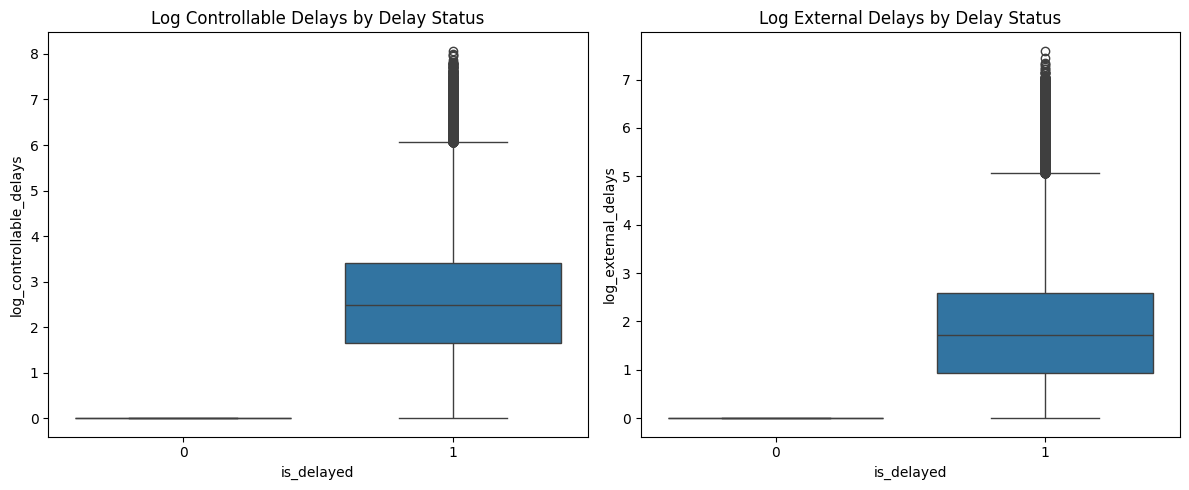

In [15]:
# Boxplots with log-transformed data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='is_delayed', y='log_controllable_delays', data=df)
plt.title('Log Controllable Delays by Delay Status')
plt.subplot(1, 2, 2)
sns.boxplot(x='is_delayed', y='log_external_delays', data=df)
plt.title('Log External Delays by Delay Status')
plt.tight_layout()
plt.show()



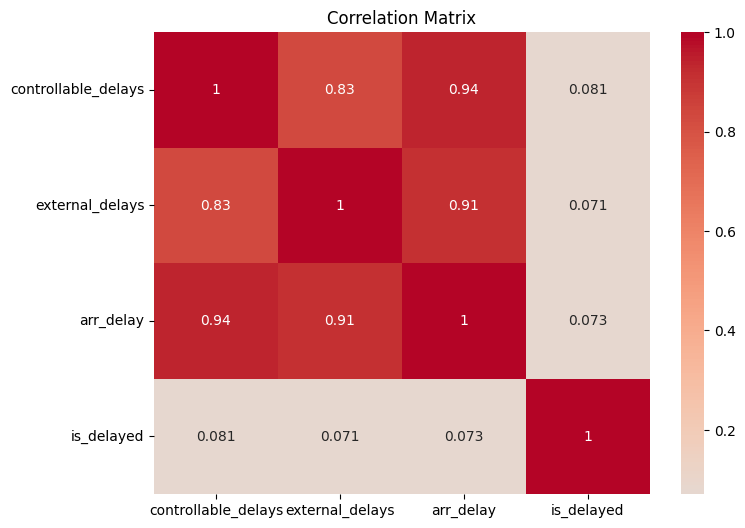

In [16]:
# Correlation with arr_delay and is_delayed
corr_matrix = df[['controllable_delays', 'external_delays', 'arr_delay', 'is_delayed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [17]:
df['controllable_ratio'] = df['controllable_delays'] /(df['controllable_delays'] + df['external_delays'])
df['controllable_ratio'] = df['controllable_ratio'].fillna(0)  # Set to 0 when total_delays = 0

# Verify the new feature
print("Descriptive Statistics for controllable_ratio:")
print(df['controllable_ratio'].describe())
print("\nNaN Values in controllable_ratio:", df['controllable_ratio'].isna().sum())

Descriptive Statistics for controllable_ratio:
count    179338.000000
mean          0.654699
std           0.251721
min           0.000000
25%           0.544377
50%           0.698531
75%           0.826207
max           1.000000
Name: controllable_ratio, dtype: float64

NaN Values in controllable_ratio: 0


In [18]:
# Calculate proportions
proportions = df['is_delayed'].value_counts(normalize=True)
print("Proportions of is_delayed:")
print(proportions)

Proportions of is_delayed:
is_delayed
1    0.950016
0    0.049984
Name: proportion, dtype: float64


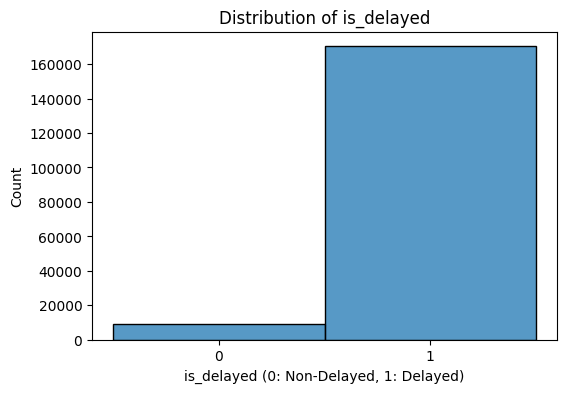

Proportions of is_delayed:
is_delayed
1    0.950016
0    0.049984
Name: proportion, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histplot of is_delayed
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='is_delayed', stat='count', discrete=True)
plt.title('Distribution of is_delayed')
plt.xlabel('is_delayed (0: Non-Delayed, 1: Delayed)')
plt.ylabel('Count')
plt.xticks([0, 1])  # Ensure only 0 and 1 are shown on x-axis
plt.show()


proportions = df['is_delayed'].value_counts(normalize=True)
print("Proportions of is_delayed:")
print(proportions)

In [20]:

df['arr_delay']

0           672.0
1           348.0
2           859.0
3            75.0
4         21424.0
           ...   
179333     8431.0
179334     2391.0
179335     3405.0
179336     7479.0
179337     9475.0
Name: arr_delay, Length: 179338, dtype: float64

In [21]:
# Count the number of rows where arr_delay > 600
num_delays_above_600 = (df['arr_delay'] > 600).sum()
print(f"Number of flights with arr_delay > 600 minutes: {num_delays_above_600}")
print(f"Proportion of flights with arr_delay > 600 minutes: {num_delays_above_600 / len(df):.4f}")

Number of flights with arr_delay > 600 minutes: 107569
Proportion of flights with arr_delay > 600 minutes: 0.5998


In [22]:
df['carrier_airport'] = df['carrier_name'] + "_" + df['airport_name']
df['carrier_delay_rate'] = df.groupby('carrier_name')['is_delayed'].transform('mean')
df['airport_delay_rate'] = df.groupby('airport_name')['is_delayed'].transform('mean')
df['route_delay_rate'] = df.groupby('carrier_airport')['is_delayed'].transform('mean')


In [23]:
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df['season'] = df['month'].map(season_map)
df = pd.get_dummies(df, columns=['season'], drop_first=True)


In [24]:
# Drop leaky columns
df1=df
leaky_cols = [
    'arr_delay', 'arr_del15', 'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay', 'carrier_ct', 'weather_ct',
    'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
    'controllable_delays', 'external_delays','log_external_delays','log_controllable_delays','controllable_ratio'
]
df = df.drop(columns=[col for col in leaky_cols if col in df.columns])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                179338 non-null  int64  
 1   month               179338 non-null  int64  
 2   carrier             179338 non-null  object 
 3   carrier_name        179338 non-null  object 
 4   airport             179338 non-null  object 
 5   airport_name        179338 non-null  object 
 6   arr_flights         178997 non-null  float64
 7   is_delayed          179338 non-null  int64  
 8   carrier_airport     179338 non-null  object 
 9   carrier_delay_rate  179338 non-null  float64
 10  airport_delay_rate  179338 non-null  float64
 11  route_delay_rate    179338 non-null  float64
 12  season_Spring       179338 non-null  bool   
 13  season_Summer       179338 non-null  bool   
 14  season_Winter       179338 non-null  bool   
dtypes: bool(3), float64(4), int64(3), 

In [26]:
cols = ['carrier', 'airport','carrier_airport']
df = df.drop(columns=[col for col in cols if col in df.columns])

In [27]:
df.isna().sum()

year                    0
month                   0
carrier_name            0
airport_name            0
arr_flights           341
is_delayed              0
carrier_delay_rate      0
airport_delay_rate      0
route_delay_rate        0
season_Spring           0
season_Summer           0
season_Winter           0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                179338 non-null  int64  
 1   month               179338 non-null  int64  
 2   carrier_name        179338 non-null  object 
 3   airport_name        179338 non-null  object 
 4   arr_flights         178997 non-null  float64
 5   is_delayed          179338 non-null  int64  
 6   carrier_delay_rate  179338 non-null  float64
 7   airport_delay_rate  179338 non-null  float64
 8   route_delay_rate    179338 non-null  float64
 9   season_Spring       179338 non-null  bool   
 10  season_Summer       179338 non-null  bool   
 11  season_Winter       179338 non-null  bool   
dtypes: bool(3), float64(4), int64(3), object(2)
memory usage: 12.8+ MB


In [29]:
# Remove rows with NaN in arr_flights
initial_rows = len(df)
df = df.dropna(subset=['arr_flights'])
print(f"Rows removed: {initial_rows - len(df)}")
print(f"New dataset size: {len(df)}")

Rows removed: 341
New dataset size: 178997


In [30]:
df = pd.get_dummies(df, columns=['carrier_name', 'airport_name'], drop_first=True)


In [31]:
X_cls = df.drop(columns=['is_delayed'])
y_cls = df['is_delayed']


In [32]:
from sklearn.model_selection import train_test_split

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)


In [33]:
X_train_cls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143197 entries, 162515 to 99991
Columns: 463 entries, year to airport_name_Yuma, AZ: Yuma MCAS/Yuma International
dtypes: bool(457), float64(4), int64(2)
memory usage: 70.1 MB


In [34]:

resampler = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Minority:Majority = 1:2
    ('under', RandomUnderSampler(sampling_strategy=0.67, random_state=42))  # Minority:Majority = 2:3
])
X_train_res, y_train_res = resampler.fit_resample(X_train_cls, y_train_cls)

# Check balance after resampling
print(pd.Series(y_train_res).value_counts(normalize=True))

is_delayed
1    0.5988
0    0.4012
Name: proportion, dtype: float64


In [35]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_res, y_train_res)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=7, class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:11:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
def evaluate_classifier(clf, X_test, y_test):
    # Make predictions
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]  # Probability for class 1
    
    # Print evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

In [37]:
print("for logistic regression model: ")
evaluate_classifier(logreg,X_test_cls,y_test_cls)
print("for Random Forest model: ")
evaluate_classifier(rf,X_test_cls,y_test_cls)
print("for XGBOost model: ")
evaluate_classifier(xgb,X_test_cls,y_test_cls)

for logistic regression model: 
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.73      0.45      1725
           1       0.99      0.92      0.95     34075

    accuracy                           0.92     35800
   macro avg       0.66      0.83      0.70     35800
weighted avg       0.95      0.92      0.93     35800

Confusion Matrix:
[[ 1256   469]
 [ 2559 31516]]
ROC AUC: 0.9371479196571928
for Random Forest model: 
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.88      0.36      1725
           1       0.99      0.85      0.92     34075

    accuracy                           0.85     35800
   macro avg       0.61      0.86      0.64     35800
weighted avg       0.96      0.85      0.89     35800

Confusion Matrix:
[[ 1516   209]
 [ 5156 28919]]
ROC AUC: 0.9197245547439046
for XGBOost model: 
Classification Report:
              precision    recall  f1-score  

In [38]:
clf=xgb

In [39]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
y_pred = xgb.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred)
f1 = f1_score(y_test_cls, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.9511
Precision: 0.9874
F1 Score : 0.9740


## Regression

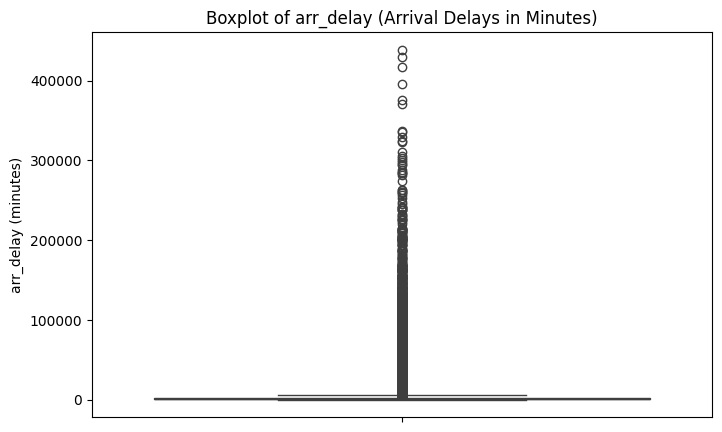

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='arr_delay',data=df1)
plt.title('Boxplot of arr_delay (Arrival Delays in Minutes)')
plt.ylabel('arr_delay (minutes)')
plt.show()

In [41]:
Q1 = df1['arr_delay'].quantile(0.25)
Q3 = df1['arr_delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1['arr_delay'] < lower_bound) | (df1['arr_delay'] > upper_bound)]
print(f"Lower Bound for Outliers: {lower_bound:.2f} minutes")
print(f"Upper Bound for Outliers: {upper_bound:.2f} minutes")
print(f"Number of Outliers in arr_delay: {len(outliers)}")
print(f"Proportion of Outliers: {len(outliers) / len(df1):.4f}")

Lower Bound for Outliers: -3100.50 minutes
Upper Bound for Outliers: 5935.50 minutes
Number of Outliers in arr_delay: 22226
Proportion of Outliers: 0.1239


In [42]:
df1 = df1[(df1['arr_delay'] >= lower_bound) & (df1['arr_delay'] <= upper_bound)]
print(f"Dataset size after removing outliers: {len(df1)}")

Dataset size after removing outliers: 156771


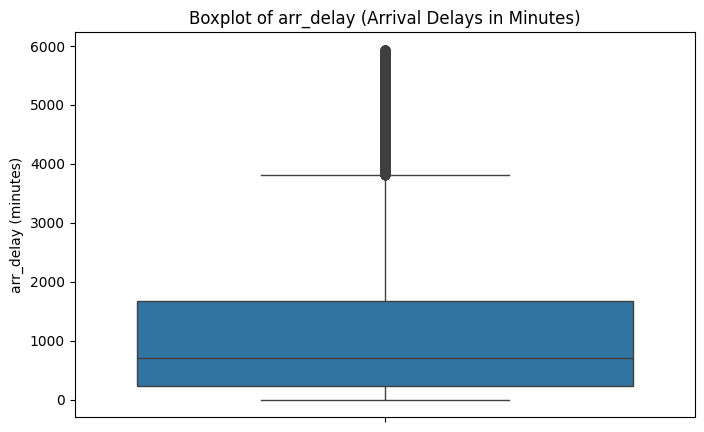

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='arr_delay',data=df1)
plt.title('Boxplot of arr_delay (Arrival Delays in Minutes)')
plt.ylabel('arr_delay (minutes)')
plt.show()

In [44]:
leaky_cols = [
     'arr_del15', 'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay', 'carrier_ct', 'weather_ct',
    'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
    'controllable_delays', 'external_delays','log_external_delays','log_controllable_delays','controllable_ratio'
]
df1 = df1.drop(columns=[col for col in leaky_cols if col in df1.columns])

In [45]:
cols = ['carrier', 'airport','carrier_airport']
df1 = df1.drop(columns=[col for col in cols if col in df1.columns])

In [46]:
df1.isna().sum()

year                  0
month                 0
carrier_name          0
airport_name          0
arr_flights           0
arr_delay             0
is_delayed            0
carrier_delay_rate    0
airport_delay_rate    0
route_delay_rate      0
season_Spring         0
season_Summer         0
season_Winter         0
dtype: int64

In [47]:
df1 = pd.get_dummies(df1, columns=['carrier_name', 'airport_name'], drop_first=True)


In [48]:
X_reg = df1.drop(columns=['arr_delay'])
y_reg = df1['arr_delay']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train_reg, y_train_reg)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gbr.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(max_depth=5, random_state=42)

In [51]:
from sklearn.metrics import r2_score

def evaluate_regression_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Evaluation:")
    print(f"MAE : {mae:.2f} minutes")
    print(f"RMSE: {rmse:.2f} minutes")
    print(f"R² Score: {r2:.4f}")
    
    return mae, rmse, r2

In [52]:
evaluate_regression_model(lr, X_test_reg, y_test_reg, "Linear Regression")
evaluate_regression_model(rf, X_test_reg, y_test_reg, "Random Forest")
evaluate_regression_model(gbr, X_test_reg, y_test_reg, "Gradient Boosting")

C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Linear Regression Evaluation:
MAE : 2632057.70 minutes
RMSE: 465957267.32 minutes
R² Score: -128137642252.3587


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Random Forest Evaluation:
MAE : 502.71 minutes
RMSE: 742.44 minutes
R² Score: 0.6747

Gradient Boosting Evaluation:
MAE : 443.40 minutes
RMSE: 654.74 minutes
R² Score: 0.7470


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(443.3981270942189, 654.7410034943636, 0.746998189625079)

In [53]:
OAI_WEIGHTS = {
    'carrier_delay': 1.0,
    'late_aircraft_delay': 0.9,
    'nas_delay': 0.5,
    'weather_delay': 0.1,
    'security_delay': 0.05
}


In [54]:
leaky_df = pd.read_csv("D:\\study\\sem5\\Summer\\SocBiz\\Airline_Delay_Cause.csv")  # original with delay causes

# Make sure this aligns with X_test rows (index-wise)
leaky_df = leaky_df.loc[X_test_cls.index, [
    'carrier_delay', 'late_aircraft_delay',
    'nas_delay', 'weather_delay', 'security_delay'
]]


In [55]:
print("X_train_cls shape:", X_train_cls.shape)
print("X_test_cls shape:", X_test_cls.shape)

X_train_cls shape: (143197, 463)
X_test_cls shape: (35800, 463)


In [56]:
X_test_cls = X_test_cls.fillna(0)

In [57]:
import xgboost
import shap

print("XGBoost version:", xgboost.__version__)
print("SHAP version:", shap.__version__)

XGBoost version: 3.0.0
SHAP version: 0.48.0


0.48.0


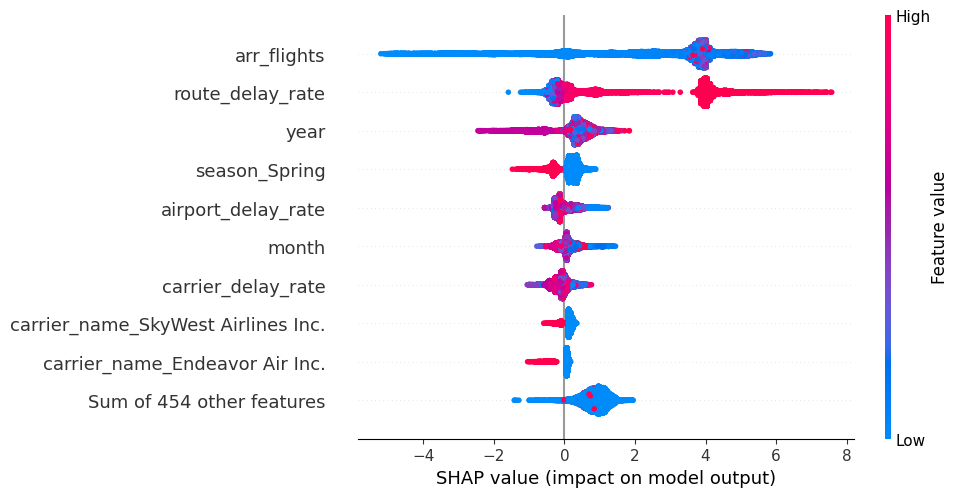

In [58]:
import shap
print(shap.__version__)



explainer = shap.Explainer(xgb)

# Get SHAP values (for many instances)
shap_values = explainer(X_test_cls)

# ✅ Directly use shap_values (Explanation object with multiple instances)
shap.plots.beeswarm(shap_values)


In [59]:
feature_delay_cause_map = {
    'carrier_delay_rate': 'carrier_delay',
    'route_delay_rate': 'late_aircraft_delay',
    'airport_delay_rate': 'nas_delay',
    'carrier_name_X'      : 'carrier_delay',
    'airport_name_X'      : 'nas_delay',
    'season_Summer'       : 'weather_delay',
    'season_Winter'       : 'weather_delay',
}


In [60]:
def get_delay_cause(feature_name):
    for key in feature_delay_cause_map:
        if feature_name.startswith(key):
            return feature_delay_cause_map[key]
    return None  


In [61]:
shap_matrix = shap_values.values  # Faster access

# Precompute cause-to-feature mapping
feature_to_cause = {feature_name: get_delay_cause(feature_name) for feature_name in X_test_cls.columns}
feature_indices = {cause: [] for cause in set(feature_to_cause.values()) if cause}
for i, feature_name in enumerate(X_test_cls.columns):
    cause = feature_to_cause[feature_name]
    if cause:
        feature_indices[cause].append(i)

# Compute OAI-weighted SHAP impact efficiently
oai_score = {}
for cause, indices in feature_indices.items():
    if indices:
        cause_shap = shap_matrix[:, indices]  # ✅ much faster
        weight = OAI_WEIGHTS.get(cause, 0)
        weighted_shap = cause_shap * weight
        total_impact = np.abs(weighted_shap).sum()
        oai_score[cause] = total_impact

# Convert to DataFrame for plotting
oai_df = pd.DataFrame(list(oai_score.items()), columns=["Delay Cause", "OAI-Weighted SHAP Impact"])
oai_df = oai_df.sort_values(by="OAI-Weighted SHAP Impact", ascending=False)


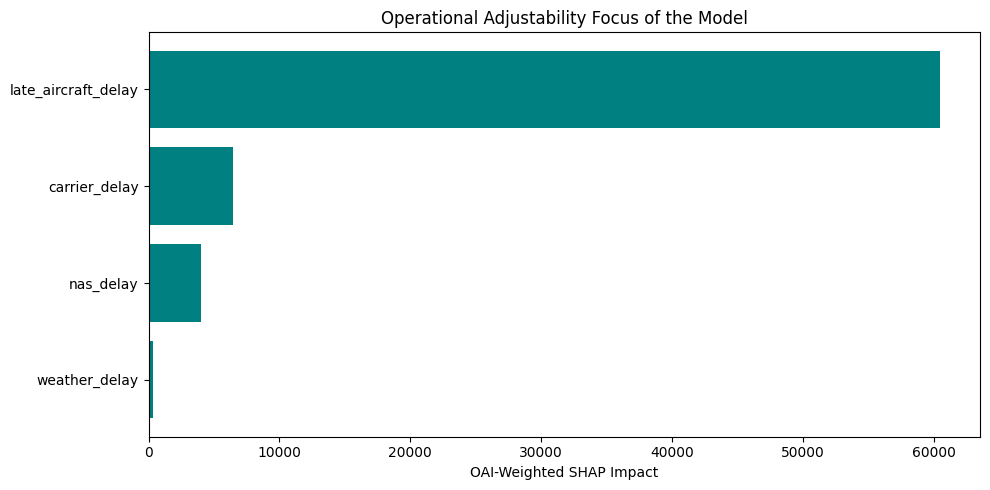

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(oai_df["Delay Cause"], oai_df["OAI-Weighted SHAP Impact"], color="teal")
plt.xlabel("OAI-Weighted SHAP Impact")
plt.title("Operational Adjustability Focus of the Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [63]:
controllable = ['carrier_delay', 'late_aircraft_delay']
uncontrollable = ['nas_delay', 'weather_delay', 'security_delay']

oai_ratio = oai_df[oai_df["Delay Cause"].isin(controllable)]["OAI-Weighted SHAP Impact"].sum() / oai_df["OAI-Weighted SHAP Impact"].sum()
print(f"OAI controllability focus: {oai_ratio*100:.2f}%")


OAI controllability focus: 93.91%


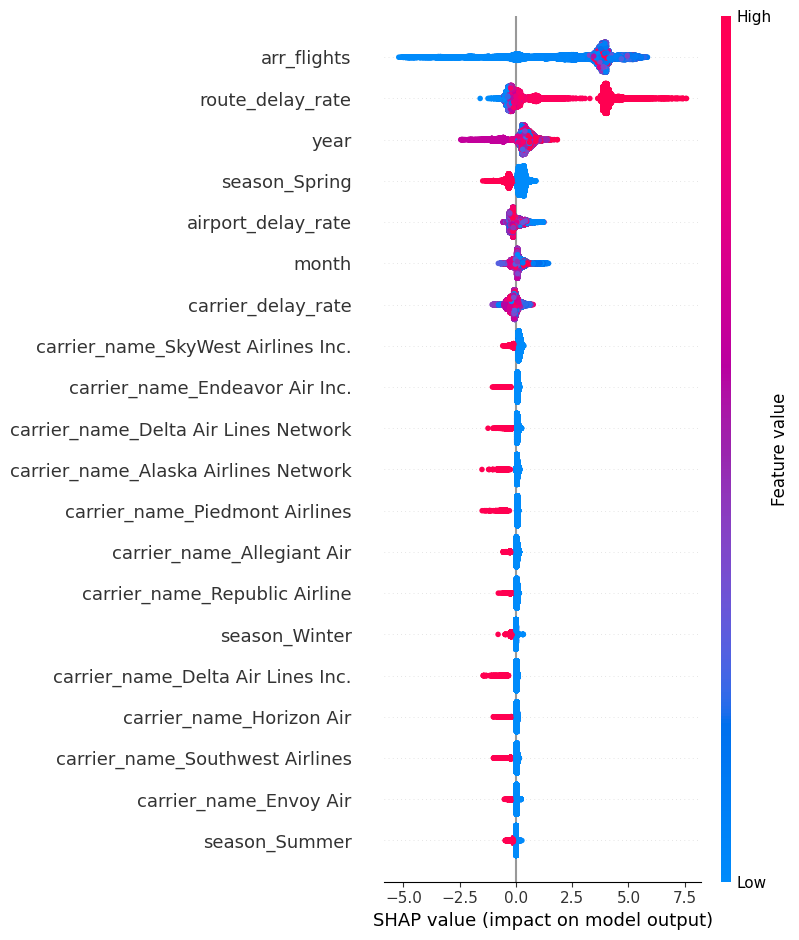

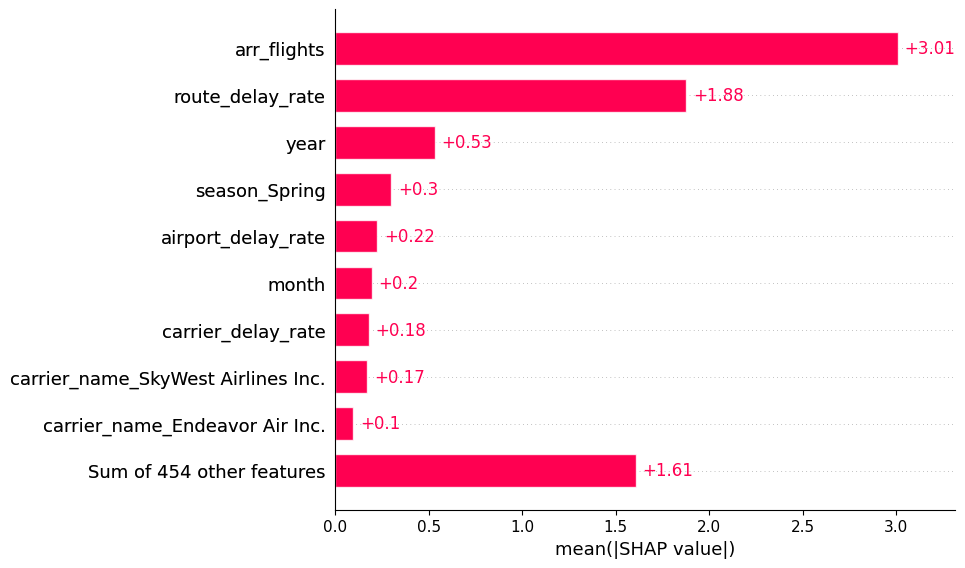

In [64]:
# Global summary plot
shap.summary_plot(shap_values, X_test_cls)

# Bar version
shap.plots.bar(shap.Explanation(values=shap_values, data=X_test_cls.values, feature_names=X_test_cls.columns))
